In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

import catboost as cb

wids_path = "/Users/diana/Documents/projects/widsdatathon2022"
sys.path.append(wids_path)

from global_vars import all_feature_columns, response_column
from utils.visualize import *

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

<IPython.core.display.Javascript object>

In [3]:
feature_dict = {
    "base_cat": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "base_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {
            "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        },
    },
    "log_temp_pca_cat": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "log_temp_precip_pca_onehot": {
        "cols_to_reduce": temp_col_list + inch_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
}

<IPython.core.display.Javascript object>

In [31]:
rmse_df = pd.DataFrame()
for config_name in feature_dict.keys():
    print(config_name)
    _df = pd.read_csv(f"{wids_path}/validation_result/{config_name}.csv").assign(
        config=config_name
    )
    rmse_df = pd.concat([rmse_df, _df], axis=0)
rmse_df = rmse_df.reset_index(drop=True)

base_cat
base_onehot
log_onehot
log_temp_pca_onehot
log_temp_pca_onehot_impute
log_temp_pca_cat
log_temp_precip_pca_onehot


<IPython.core.display.Javascript object>

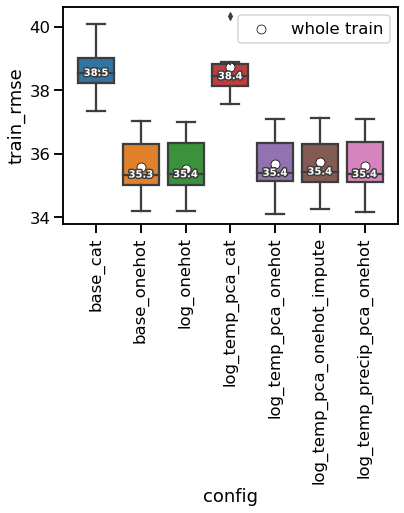

<IPython.core.display.Javascript object>

In [35]:
ax = sns.boxplot(
    data=rmse_df.query("method == 'loyo'").sort_values("config"),
    x="config",
    y="train_rmse",
)
add_median_labels(ax)
sns.scatterplot(
    data=rmse_df.query("method == 'whole train'").sort_values("config"),
    x="config",
    y="train_rmse",
    ax=ax,
    color="white",
    edgecolor="k",
    label="whole train",
)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

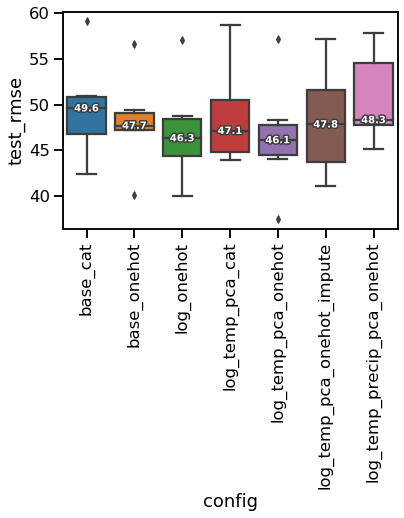

<IPython.core.display.Javascript object>

In [36]:
ax = sns.boxplot(data=rmse_df.sort_values("config"), x="config", y="test_rmse")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
add_median_labels(ax)

log_temp_pca_onehot
log_temp_pca_onehot
log_temp_pca_onehot
log_temp_pca_onehot


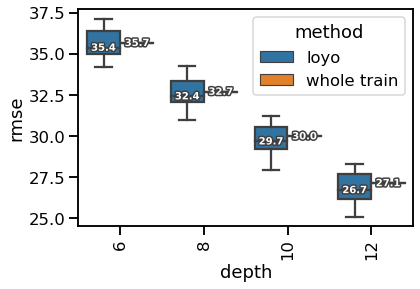

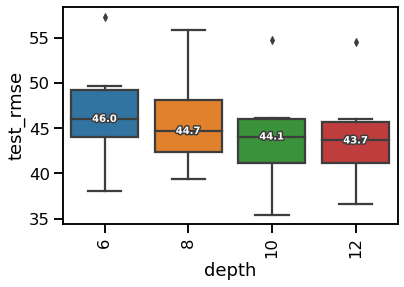

<IPython.core.display.Javascript object>

In [30]:
# Hyper-parameter tuning model performance based on best feature combo
rmse_df = pd.DataFrame()
config_name = "log_temp_pca_onehot"
for depth in [6, 8, 10, 12]:
    print(config_name)
    _df = pd.read_csv(
        f"{wids_path}/validation_result/{config_name}_depth{depth}.csv"
    ).assign(config=config_name, depth=depth)
    rmse_df = pd.concat([rmse_df, _df], axis=0)
rmse_df = rmse_df.reset_index(drop=True)

fig, ax = plt.subplots()
sns.boxplot(
    data=pd.melt(
        rmse_df,
        id_vars=["method", "depth"],
        value_name="rmse",
        value_vars=["train_rmse"],
    ),
    x="depth",
    y="rmse",
    hue="method",
    ax=ax,
)
add_median_labels(ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.figure()
ax = sns.boxplot(data=rmse_df.sort_values("depth"), x="depth", y="test_rmse")
add_median_labels(ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [18]:
rmse_df.query("method == 'whole train'").sort_values("depth")

,left_out_year,train_rmse,test_rmse,method,config,depth
6,0.0,35.655733,NaN,whole train,log_temp_pca_onehot,6
13,0.0,32.694107,NaN,whole train,log_temp_pca_onehot,8
20,0.0,29.987524,NaN,whole train,log_temp_pca_onehot,10
27,0.0,27.141212,NaN,whole train,log_temp_pca_onehot,12


<IPython.core.display.Javascript object>